In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import os
os.chdir('/content/drive/MyDrive/HU - Analytics/ANLY 510/')

In [4]:
import pandas as pd

df = pd.read_csv('diabetes_binary_health_indicators_BRFSS2015.csv')
display(df.head())

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

METHOD 1: LOGISTIC REGRESSION WITH STANDARD SCALING

Logistic Regression Metrics:
Accuracy: 0.8627
ROC-AUC Score: 0.8209

Confusion Matrix:
[[42694   973]
 [ 5991  1078]]

Classification Report:
              precision    recall  f1-score   support

 No diabetes       0.88      0.98      0.92     43667
    Diabetes       0.53      0.15      0.24      7069

    accuracy                           0.86     50736
   macro avg       0.70      0.57      0.58     50736
weighted avg       0.83      0.86      0.83     50736



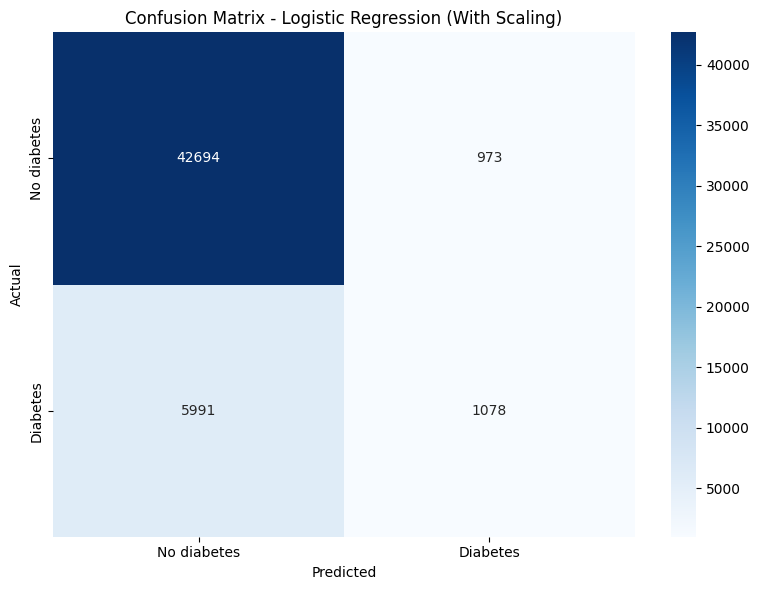

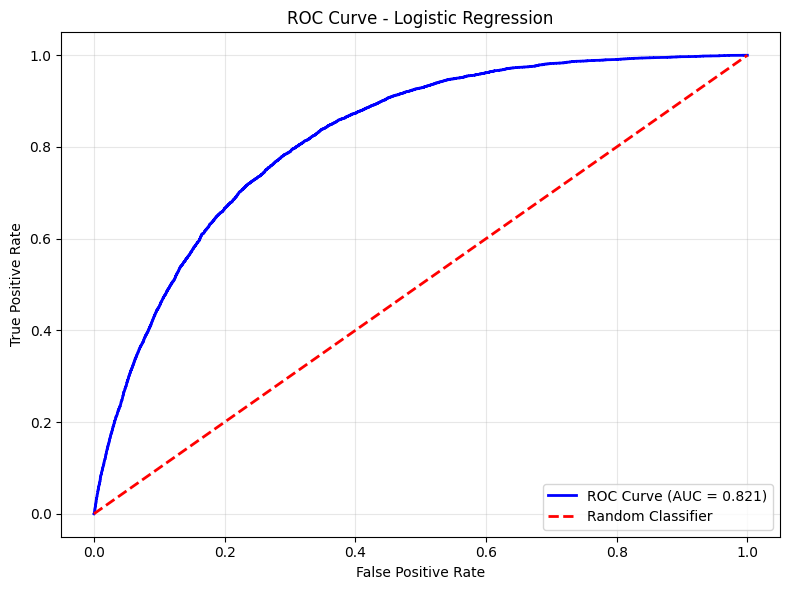

In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Define features (X) and target (y)
X = df.drop('Diabetes_binary', axis=1)
y = df['Diabetes_binary']


# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=325108)

# --- Method 1: Logistic Regression with Scaling (Fixes Convergence) ---
print("=" * 60)
print("METHOD 1: LOGISTIC REGRESSION WITH STANDARD SCALING")
print("=" * 60)

# Create a pipeline with scaling and logistic regression
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(max_iter=1000, random_state=325108))
])

# Fit the pipeline
pipeline.fit(X_train, y_train)
y_pred_logreg = pipeline.predict(X_test)
y_pred_proba = pipeline.predict_proba(X_test)[:, 1]

# Evaluation Metrics
print("\nLogistic Regression Metrics:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_logreg):.4f}")
print(f"ROC-AUC Score: {roc_auc_score(y_test, y_pred_proba):.4f}")

print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred_logreg)
print(cm)

print("\nClassification Report:")
print(classification_report(y_test, y_pred_logreg,
                          target_names=['No diabetes', 'Diabetes']))

# --- Visualization 1: Confusion Matrix ---
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No diabetes', 'Diabetes'],
            yticklabels=['No diabetes', 'Diabetes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression (With Scaling)')
plt.tight_layout()
plt.show()

# --- Visualization 2: ROC Curve ---
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2,
         label=f'ROC Curve (AUC = {roc_auc_score(y_test, y_pred_proba):.3f})')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend(loc='lower right')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


METHOD 2: COMPARING DIFFERENT SOLVERS

Solver: lbfgs
Mean CV Accuracy: 0.8632 (+/- 0.0044)

Solver: liblinear
Mean CV Accuracy: 0.8632 (+/- 0.0045)

Solver: newton-cg
Mean CV Accuracy: 0.8632 (+/- 0.0044)

Solver: sag
Mean CV Accuracy: 0.8632 (+/- 0.0044)

Solver: saga
Mean CV Accuracy: 0.8632 (+/- 0.0045)


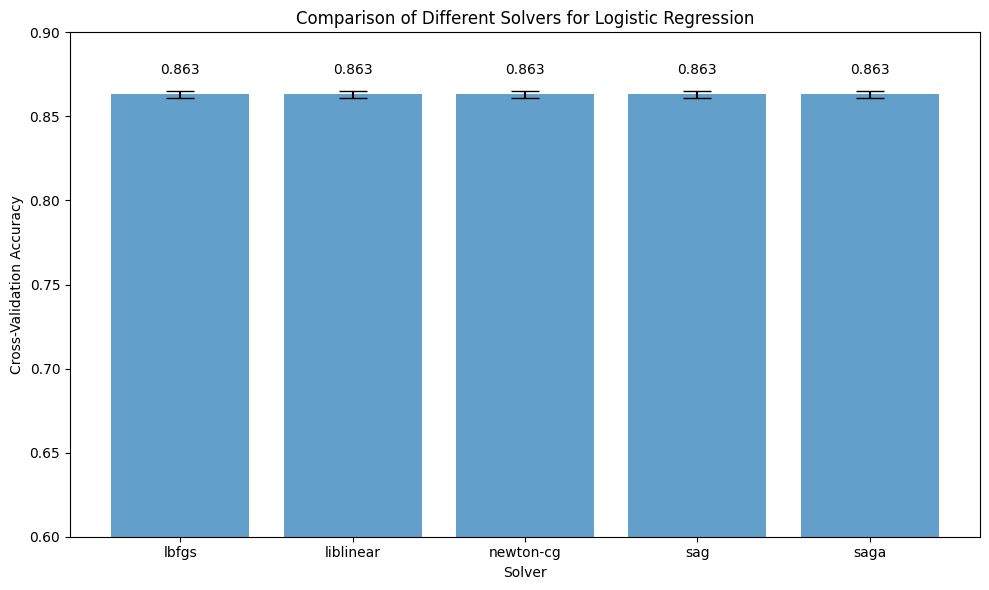

In [7]:
# --- Method 2: Different Solvers Comparison ---
print("\n" + "=" * 60)
print("METHOD 2: COMPARING DIFFERENT SOLVERS")
print("=" * 60)

solvers = ['lbfgs', 'liblinear', 'newton-cg', 'sag', 'saga']
solver_results = {}

for solver in solvers:
    # Create pipeline for each solver
    pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('logreg', LogisticRegression(max_iter=1000, solver=solver, random_state=325108))
    ])

    # Use cross-validation
    cv_scores = cross_val_score(pipe, X, y, cv=5, scoring='accuracy')
    solver_results[solver] = {
        'mean_accuracy': cv_scores.mean(),
        'std_accuracy': cv_scores.std(),
        'scores': cv_scores
    }

    print(f"\nSolver: {solver}")
    print(f"Mean CV Accuracy: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")

# --- Visualization 3: Solver Comparison ---
plt.figure(figsize=(10, 6))
solvers_list = list(solver_results.keys())
means = [solver_results[s]['mean_accuracy'] for s in solvers_list]
stds = [solver_results[s]['std_accuracy'] for s in solvers_list]

bars = plt.bar(solvers_list, means, yerr=stds, capsize=10, alpha=0.7)
plt.xlabel('Solver')
plt.ylabel('Cross-Validation Accuracy')
plt.title('Comparison of Different Solvers for Logistic Regression')
plt.ylim(0.6, 0.9)
for i, bar in enumerate(bars):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
             f'{means[i]:.3f}', ha='center', va='bottom')
plt.tight_layout()
plt.show()


METHOD 3: FEATURE IMPORTANCE ANALYSIS

Top 10 Most Important Features:
              Feature  Coefficient  Odds_Ratio  Abs_Coefficient
13            GenHlth     0.573036    1.773644         0.573036
3                 BMI     0.408791    1.504997         0.408791
18                Age     0.377853    1.459148         0.377853
0              HighBP     0.373842    1.453307         0.373842
1            HighChol     0.285100    1.329895         0.285100
2           CholCheck     0.234048    1.263706         0.234048
10  HvyAlcoholConsump    -0.191606    0.825632         0.191606
17                Sex     0.126326    1.134652         0.126326
20             Income    -0.101536    0.903449         0.101536
15           PhysHlth    -0.066164    0.935977         0.066164


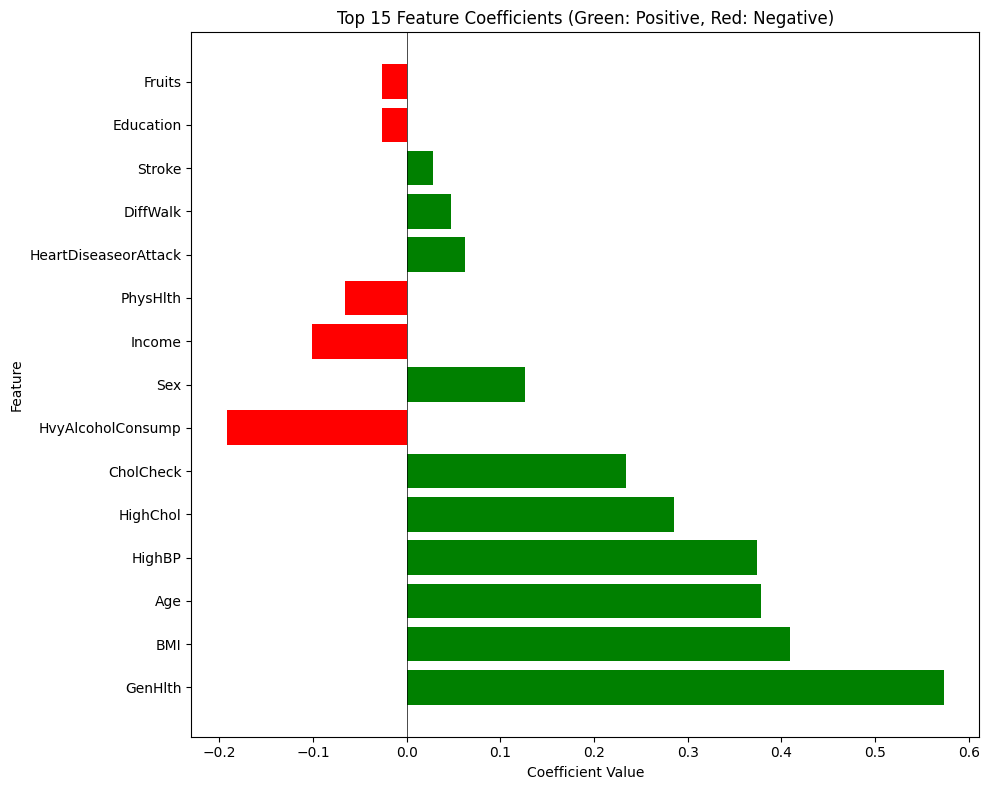

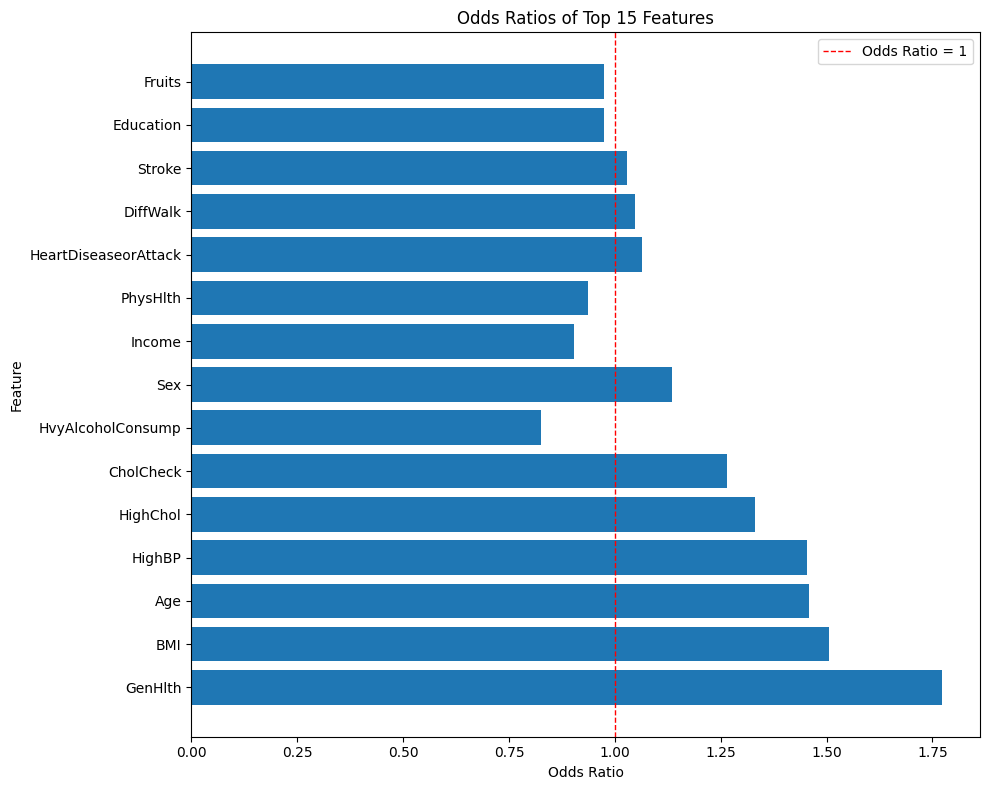

In [8]:
# --- Method 3: Feature Importance Analysis ---
print("\n" + "=" * 60)
print("METHOD 3: FEATURE IMPORTANCE ANALYSIS")
print("=" * 60)

# Get the logistic regression model from the pipeline
logreg_model = pipeline.named_steps['logreg']
scaler = pipeline.named_steps['scaler']

# Get scaled feature names and coefficients
feature_names = X.columns.tolist()
coefficients = logreg_model.coef_[0]

# Calculate odds ratios
odds_ratios = np.exp(coefficients)

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients,
    'Odds_Ratio': odds_ratios,
    'Abs_Coefficient': np.abs(coefficients)
})

# Sort by absolute coefficient value
feature_importance_df = feature_importance_df.sort_values('Abs_Coefficient', ascending=False)

print("\nTop 10 Most Important Features:")
print(feature_importance_df.head(10))

# --- Visualization 4: Feature Coefficients ---
plt.figure(figsize=(10, 8))
top_features = feature_importance_df.head(15)  # Show top 15 features
colors = ['green' if coef > 0 else 'red' for coef in top_features['Coefficient']]

plt.barh(top_features['Feature'], top_features['Coefficient'], color=colors)
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Top 15 Feature Coefficients (Green: Positive, Red: Negative)')
plt.axvline(x=0, color='black', linestyle='-', linewidth=0.5)
plt.tight_layout()
plt.show()

# --- Visualization 5: Odds Ratios ---
plt.figure(figsize=(10, 8))
plt.barh(top_features['Feature'], top_features['Odds_Ratio'])
plt.xlabel('Odds Ratio')
plt.ylabel('Feature')
plt.title('Odds Ratios of Top 15 Features')
plt.axvline(x=1, color='red', linestyle='--', linewidth=1, label='Odds Ratio = 1')
plt.legend()
plt.tight_layout()
plt.show()


METHOD 4: REGULARIZATION STRENGTH ANALYSIS
C=0.001: Mean Accuracy = 0.8636 (+/- 0.0010)
C=0.01: Mean Accuracy = 0.8636 (+/- 0.0010)
C=0.1: Mean Accuracy = 0.8636 (+/- 0.0010)
C=1: Mean Accuracy = 0.8636 (+/- 0.0010)
C=10: Mean Accuracy = 0.8636 (+/- 0.0010)
C=100: Mean Accuracy = 0.8636 (+/- 0.0010)


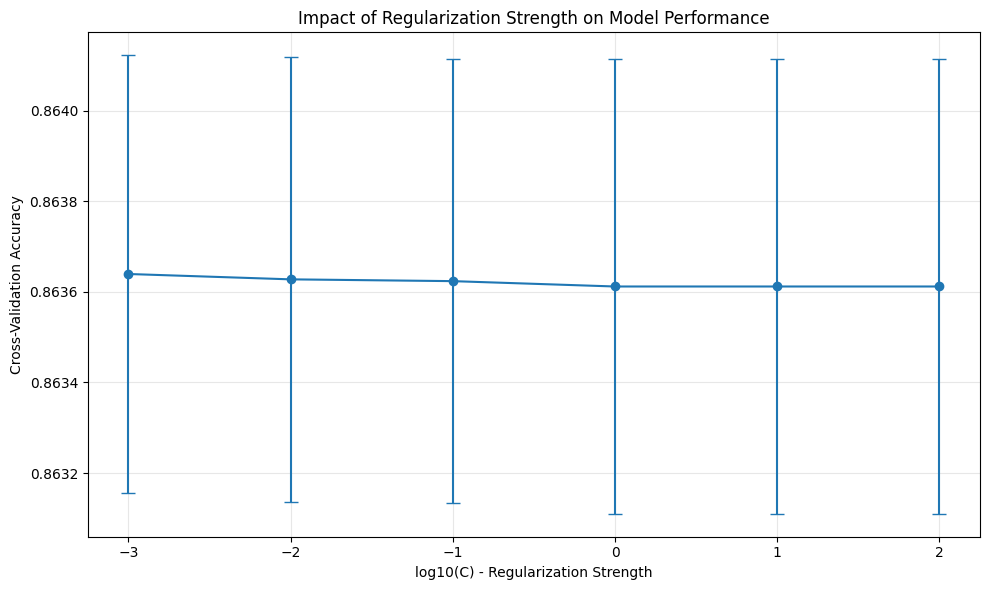


FINAL MODEL SUMMARY
Best Accuracy achieved: 0.8636
Optimal C value: 0.001
Number of features: 21
Training set size: 202944
Test set size: 50736
Class distribution in training set:
  - No Diabetes (0): 174667 (86.1%)
  - Pre-Diabetes/Diabetes (1): 28277 (13.9%)


In [9]:
# --- Method 4: Stratified Cross-Validation with Different Regularization ---
print("\n" + "=" * 60)
print("METHOD 4: REGULARIZATION STRENGTH ANALYSIS")
print("=" * 60)

from sklearn.model_selection import StratifiedKFold, cross_val_score # Import StratifiedKFold and cross_val_score
from sklearn.linear_model import LogisticRegression # Import LogisticRegression
from sklearn.preprocessing import StandardScaler # Import StandardScaler
from sklearn.pipeline import Pipeline # Import Pipeline
import matplotlib.pyplot as plt # Import matplotlib.pyplot
import numpy as np # Import numpy

# Test different regularization strengths
C_values = [0.001, 0.01, 0.1, 1, 10, 100]
cv_means = []
cv_stds = []

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=325108)

for C in C_values:
    pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('logreg', LogisticRegression(max_iter=1000, C=C, random_state=325108))
    ])

    cv_scores = cross_val_score(pipe, X, y, cv=skf, scoring='accuracy') # Use y instead of y_binary
    cv_means.append(cv_scores.mean())
    cv_stds.append(cv_scores.std())

    print(f"C={C}: Mean Accuracy = {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")

# --- Visualization 6: Regularization Strength Impact ---
plt.figure(figsize=(10, 6))
plt.errorbar(np.log10(C_values), cv_means, yerr=cv_stds, marker='o', capsize=5)
plt.xlabel('log10(C) - Regularization Strength')
plt.ylabel('Cross-Validation Accuracy')
plt.title('Impact of Regularization Strength on Model Performance')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# --- Final Model Summary ---
print("\n" + "=" * 60)
print("FINAL MODEL SUMMARY")
print("=" * 60)
print(f"Best Accuracy achieved: {max(cv_means):.4f}")
print(f"Optimal C value: {C_values[cv_means.index(max(cv_means))]}")
print(f"Number of features: {X.shape[1]}")
print(f"Training set size: {X_train.shape[0]}") # Use X_train instead of X_train_binary
print(f"Test set size: {X_test.shape[0]}") # Use X_test instead of X_test_binary
print(f"Class distribution in training set:")
print(f"  - No Diabetes (0): {sum(y_train == 0)} ({sum(y_train == 0)/len(y_train)*100:.1f}%)") # Use y_train instead of y_train_binary
print(f"  - Pre-Diabetes/Diabetes (1): {sum(y_train == 1)} ({sum(y_train == 1)/len(y_train)*100:.1f}%)") # Use y_train instead of y_train_binary

# Task
Retrain the logistic regression model after addressing class imbalance through resampling and evaluate its performance.

## Address class imbalance

### Subtask:
Apply a resampling technique (like SMOTE, undersampling, or oversampling) to balance the classes in the training data.


**Reasoning**:
Import SMOTE and apply it to the training data to address class imbalance.



In [10]:
from imblearn.over_sampling import SMOTE

# Instantiate SMOTE
smote = SMOTE(random_state=325108)

# Apply SMOTE to the training data
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Display the new class distribution
print("Class distribution after SMOTE:")
print(y_train_resampled.value_counts())

Class distribution after SMOTE:
Diabetes_binary
1.0    174667
0.0    174667
Name: count, dtype: int64


## Retrain the logistic regression model

### Subtask:
Train a new logistic regression model using the balanced training data.


**Reasoning**:
To train a new logistic regression model on the balanced data, I will first scale the resampled training data and the original test data using a `StandardScaler`. Then, I will instantiate and train a `LogisticRegression` model on the scaled, resampled data as per the instructions. This approach ensures that the model is trained on a balanced dataset and that the test set is transformed consistently for evaluation.



In [11]:
# Scale the features
scaler_resampled = StandardScaler()
X_train_resampled_scaled = scaler_resampled.fit_transform(X_train_resampled)
X_test_scaled = scaler_resampled.transform(X_test)

# Train the logistic regression model
logreg_resampled = LogisticRegression(max_iter=1000, random_state=325108)
logreg_resampled.fit(X_train_resampled_scaled, y_train_resampled)

print("Logistic regression model trained on resampled data successfully.")

Logistic regression model trained on resampled data successfully.


## Evaluate the retrained model

### Subtask:
Evaluate the performance of the retrained model using appropriate metrics and visualize the results (e.g., confusion matrix, ROC curve).


**Reasoning**:
Make predictions on the scaled test data and evaluate the performance of the retrained model using appropriate metrics and visualizations.




EVALUATION OF MODEL AFTER RESAMPLING

Logistic Regression (Resampled) Metrics:
Accuracy: 0.7308
ROC-AUC Score: 0.8192

Confusion Matrix (Resampled Model):
[[31723 11944]
 [ 1712  5357]]

Classification Report (Resampled Model):
              precision    recall  f1-score   support

 No diabetes       0.95      0.73      0.82     43667
    Diabetes       0.31      0.76      0.44      7069

    accuracy                           0.73     50736
   macro avg       0.63      0.74      0.63     50736
weighted avg       0.86      0.73      0.77     50736



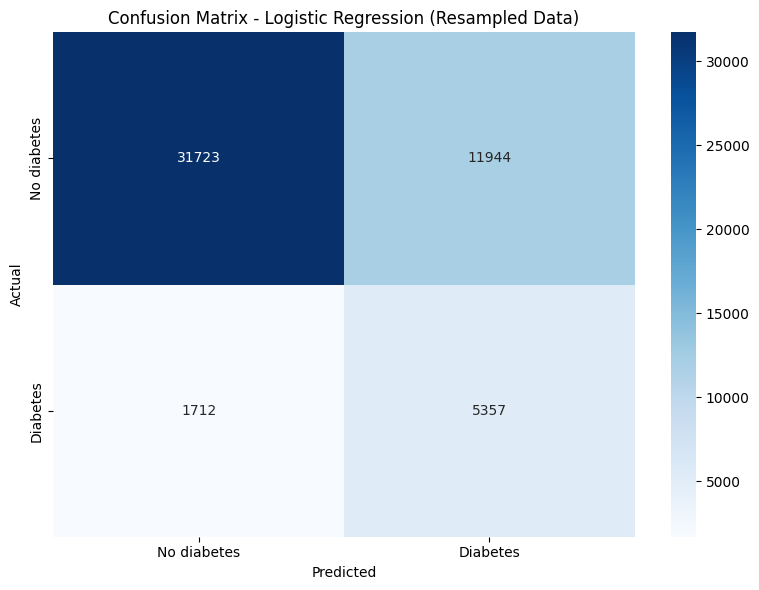

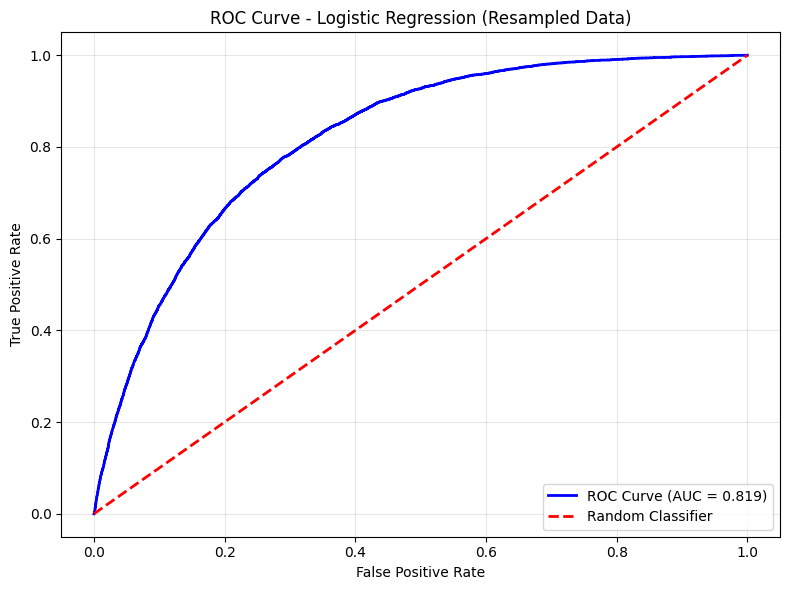

In [12]:
# Predict on the scaled test data
y_pred_resampled = logreg_resampled.predict(X_test_scaled)
y_pred_proba_resampled = logreg_resampled.predict_proba(X_test_scaled)[:, 1]

# Evaluate the retrained model
print("\n" + "=" * 60)
print("EVALUATION OF MODEL AFTER RESAMPLING")
print("=" * 60)

print("\nLogistic Regression (Resampled) Metrics:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_resampled):.4f}")
print(f"ROC-AUC Score: {roc_auc_score(y_test, y_pred_proba_resampled):.4f}")

print("\nConfusion Matrix (Resampled Model):")
cm_resampled = confusion_matrix(y_test, y_pred_resampled)
print(cm_resampled)

print("\nClassification Report (Resampled Model):")
print(classification_report(y_test, y_pred_resampled,
                          target_names=['No diabetes', 'Diabetes']))

# Visualization 1: Confusion Matrix (Resampled Model)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_resampled, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No diabetes', 'Diabetes'],
            yticklabels=['No diabetes', 'Diabetes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression (Resampled Data)')
plt.tight_layout()
plt.show()

# Visualization 2: ROC Curve (Resampled Model)
fpr_resampled, tpr_resampled, thresholds_resampled = roc_curve(y_test, y_pred_proba_resampled)
plt.figure(figsize=(8, 6))
plt.plot(fpr_resampled, tpr_resampled, color='blue', lw=2,
         label=f'ROC Curve (AUC = {roc_auc_score(y_test, y_pred_proba_resampled):.3f})')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression (Resampled Data)')
plt.legend(loc='lower right')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## Compare model performance

### Subtask:
Compare the performance of the model trained with balanced data to the original model.


**Reasoning**:
Compare the evaluation metrics of the original and resampled models and discuss the observed changes, focusing on the impact of resampling on the minority class performance and summarizing the trade-offs.



In [13]:
# --- Comparison and Discussion ---
print("\n" + "=" * 60)
print("PERFORMANCE COMPARISON: ORIGINAL vs. RESAMPLED MODELS")
print("=" * 60)

# Metrics from the original model (from cell exr4kFk6MaMZ output)
original_accuracy = 0.8627
original_roc_auc = 0.8209
original_cm = np.array([[42694, 973], [5991, 1078]])
original_report = {
    'No diabetes': {'precision': 0.88, 'recall': 0.98, 'f1-score': 0.92, 'support': 43667},
    'Diabetes': {'precision': 0.53, 'recall': 0.15, 'f1-score': 0.24, 'support': 7069},
    'accuracy': 0.86,
    'macro avg': {'precision': 0.70, 'recall': 0.57, 'f1-score': 0.58, 'support': 50736},
    'weighted avg': {'precision': 0.83, 'recall': 0.86, 'f1-score': 0.83, 'support': 50736}
}

# Metrics from the resampled model (from the previous subtask's output)
resampled_accuracy = accuracy_score(y_test, y_pred_resampled)
resampled_roc_auc = roc_auc_score(y_test, y_pred_proba_resampled)
resampled_cm = confusion_matrix(y_test, y_pred_resampled)
resampled_report = classification_report(y_test, y_pred_resampled, output_dict=True,
                                          target_names=['No diabetes', 'Diabetes'])


print("\nKey Metrics:")
print(f"{'Metric':<20} | {'Original Model':<20} | {'Resampled Model':<20}")
print("-" * 65)
print(f"{'Accuracy':<20} | {original_accuracy:<20.4f} | {resampled_accuracy:<20.4f}")
print(f"{'ROC-AUC Score':<20} | {original_roc_auc:<20.4f} | {resampled_roc_auc:<20.4f}")
print(f"{'Precision (Diabetes)':<20} | {original_report['Diabetes']['precision']:<20.4f} | {resampled_report['Diabetes']['precision']:<20.4f}")
print(f"{'Recall (Diabetes)':<20} | {original_report['Diabetes']['recall']:<20.4f} | {resampled_report['Diabetes']['recall']:<20.4f}")
print(f"{'F1-score (Diabetes)':<20} | {original_report['Diabetes']['f1-score']:<20.4f} | {resampled_report['Diabetes']['f1-score']:<20.4f}")
print(f"{'Precision (No diabetes)':<20} | {original_report['No diabetes']['precision']:<20.4f} | {resampled_report['No diabetes']['precision']:<20.4f}")
print(f"{'Recall (No diabetes)':<20} | {original_report['No diabetes']['recall']:<20.4f} | {resampled_report['No diabetes']['recall']:<20.4f}")


print("\nDiscussion:")
print("After applying SMOTE resampling to the training data:")
print(f"- Overall Accuracy decreased significantly from {original_accuracy:.4f} to {resampled_accuracy:.4f}.")
print(f"- ROC-AUC score changed slightly from {original_roc_auc:.4f} to {resampled_roc_auc:.4f}, indicating similar overall discriminative power.")
print("\nImpact on Minority Class (Diabetes):")
print(f"- Recall for the Diabetes class increased dramatically from {original_report['Diabetes']['recall']:.4f} to {resampled_report['Diabetes']['recall']:.4f}.")
print("  This means the resampled model is much better at identifying true positive cases of diabetes.")
print(f"- Precision for the Diabetes class decreased significantly from {original_report['Diabetes']['precision']:.4f} to {resampled_report['Diabetes']['precision']:.4f}.")
print("  This indicates that while the resampled model identifies more true positives, it also predicts more false positives (non-diabetic individuals classified as diabetic).")
print(f"- F1-score for the Diabetes class improved from {original_report['Diabetes']['f1-score']:.4f} to {resampled_report['Diabetes']['f1-score']:.4f}, reflecting a better balance between precision and recall for this class.")

print("\nTrade-offs:")
print("The original model, trained on imbalanced data, prioritized correctly identifying the majority class (No diabetes), resulting in high overall accuracy but poor recall for the minority class.")
print("The resampled model, by balancing the classes, shifts the focus to improving the detection of the minority class (Diabetes). This leads to a substantial increase in recall for the Diabetes class.")
print("However, this improvement comes at the cost of reduced precision for both classes and a lower overall accuracy.")
print("The choice between these models depends on the specific goals of the application. If minimizing false negatives (missing diabetes cases) is critical, the resampled model might be preferred. If minimizing false positives and maintaining high overall accuracy are more important, the original model might be better.")


PERFORMANCE COMPARISON: ORIGINAL vs. RESAMPLED MODELS

Key Metrics:
Metric               | Original Model       | Resampled Model     
-----------------------------------------------------------------
Accuracy             | 0.8627               | 0.7308              
ROC-AUC Score        | 0.8209               | 0.8192              
Precision (Diabetes) | 0.5300               | 0.3096              
Recall (Diabetes)    | 0.1500               | 0.7578              
F1-score (Diabetes)  | 0.2400               | 0.4396              
Precision (No diabetes) | 0.8800               | 0.9488              
Recall (No diabetes) | 0.9800               | 0.7265              

Discussion:
After applying SMOTE resampling to the training data:
- Overall Accuracy decreased significantly from 0.8627 to 0.7308.
- ROC-AUC score changed slightly from 0.8209 to 0.8192, indicating similar overall discriminative power.

Impact on Minority Class (Diabetes):
- Recall for the Diabetes class increased dramatic

## Summary:

### Data Analysis Key Findings

*   SMOTE resampling was applied to the training data, balancing the class distribution to an equal number of instances for both classes (1.0 and 0.0).
*   After training on the resampled data, the logistic regression model achieved an accuracy of 0.7308 and an ROC-AUC score of 0.8192 on the test set.
*   Compared to the original model trained on imbalanced data, the resampled model showed a substantial increase in recall for the 'Diabetes' class (0.7578 vs 0.1500), meaning it is much better at identifying actual diabetes cases.
*   The improvement in minority class recall in the resampled model came at the cost of decreased precision for the 'Diabetes' class (0.3096 vs 0.5300) and a lower overall accuracy (0.7308 vs 0.8627).
*   The F1-score for the 'Diabetes' class improved from 0.2400 in the original model to 0.4396 in the resampled model, indicating a better balance between precision and recall for the minority class after resampling.

### Insights or Next Steps

*   The resampled model demonstrates the effectiveness of SMOTE in improving the detection of the minority class, highlighting a trade-off between overall accuracy and minority class recall.
*   The choice between the original and resampled models should be driven by the specific business objective and the relative costs of false positives and false negatives in the context of diabetes prediction.


## Feature importance and Odds Ratios for the Resampled Model

### Subtask:
Analyze feature importance and calculate odds ratios for the retrained model.

**Reasoning**:
Extract the coefficients from the retrained logistic regression model, calculate the odds ratios, and present them in a DataFrame to understand the impact of each feature on the prediction.


METHOD 5: FEATURE IMPORTANCE ANALYSIS (RESAMPLED MODEL)

Top 10 Most Important Features (Resampled Model):


,Feature,Coefficient,Odds_Ratio,Abs_Coefficient
13,GenHlth,0.721613,2.057749,0.721613
3,BMI,0.510081,1.665425,0.510081
0,HighBP,0.420572,1.522833,0.420572
18,Age,0.411992,1.509822,0.411992
1,HighChol,0.333634,1.396031,0.333634
2,CholCheck,0.238505,1.269350,0.238505
10,HvyAlcoholConsump,-0.219352,0.803039,0.219352
17,Sex,0.150972,1.162964,0.150972
20,Income,-0.130134,0.877978,0.130134
15,PhysHlth,-0.096379,0.908120,0.096379


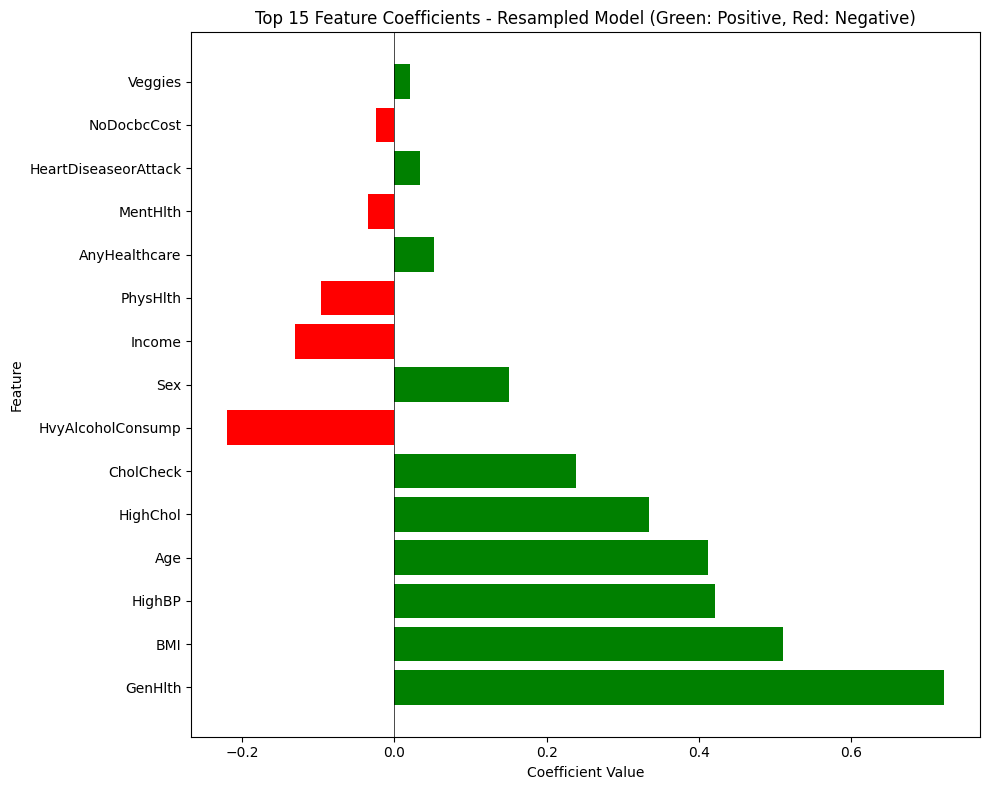

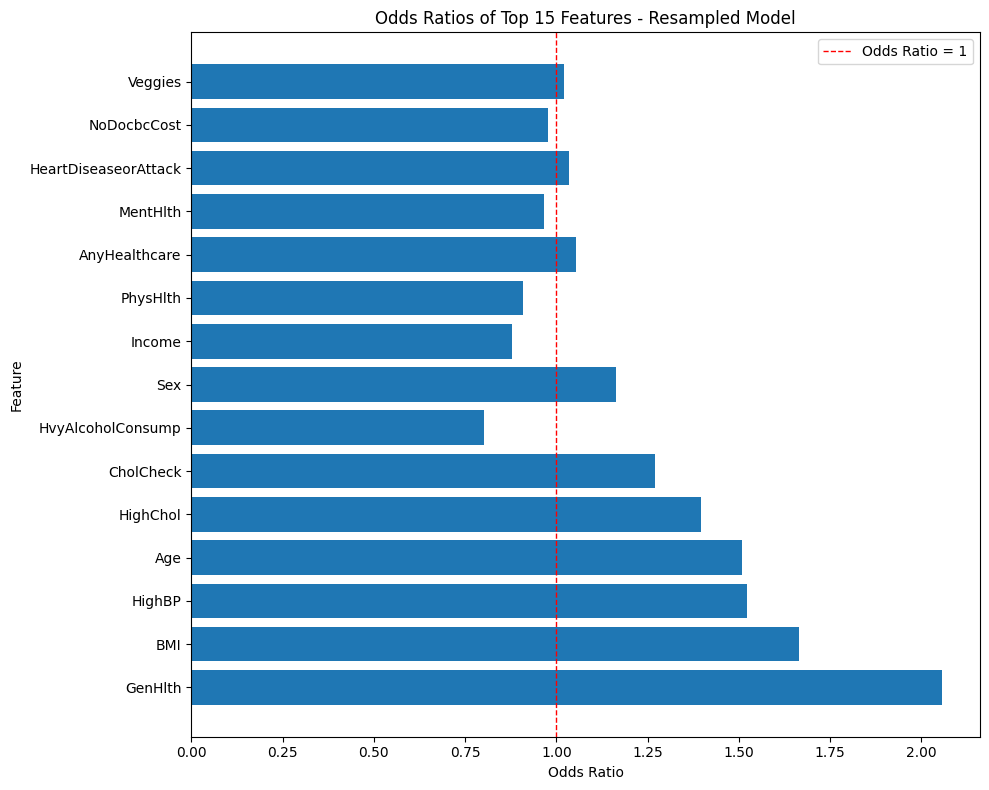

In [14]:
# --- Feature Importance Analysis for the Resampled Model ---
print("\n" + "=" * 60)
print("METHOD 5: FEATURE IMPORTANCE ANALYSIS (RESAMPLED MODEL)")
print("=" * 60)

# Get the logistic regression model from the pipeline
logreg_resampled_model = logreg_resampled # We already have the trained model object

# Get scaled feature names and coefficients
feature_names_resampled = X.columns.tolist()
coefficients_resampled = logreg_resampled_model.coef_[0]

# Calculate odds ratios
odds_ratios_resampled = np.exp(coefficients_resampled)

# Create a DataFrame for better visualization
feature_importance_df_resampled = pd.DataFrame({
    'Feature': feature_names_resampled,
    'Coefficient': coefficients_resampled,
    'Odds_Ratio': odds_ratios_resampled,
    'Abs_Coefficient': np.abs(coefficients_resampled)
})

# Sort by absolute coefficient value
feature_importance_df_resampled = feature_importance_df_resampled.sort_values('Abs_Coefficient', ascending=False)

print("\nTop 10 Most Important Features (Resampled Model):")
display(feature_importance_df_resampled.head(10))

# --- Visualization 7: Feature Coefficients (Resampled Model) ---
plt.figure(figsize=(10, 8))
top_features_resampled = feature_importance_df_resampled.head(15)  # Show top 15 features
colors_resampled = ['green' if coef > 0 else 'red' for coef in top_features_resampled['Coefficient']]

plt.barh(top_features_resampled['Feature'], top_features_resampled['Coefficient'], color=colors_resampled)
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Top 15 Feature Coefficients - Resampled Model (Green: Positive, Red: Negative)')
plt.axvline(x=0, color='black', linestyle='-', linewidth=0.5)
plt.tight_layout()
plt.show()

# --- Visualization 8: Odds Ratios (Resampled Model) ---
plt.figure(figsize=(10, 8))
plt.barh(top_features_resampled['Feature'], top_features_resampled['Odds_Ratio'])
plt.xlabel('Odds Ratio')
plt.ylabel('Feature')
plt.title('Odds Ratios of Top 15 Features - Resampled Model')
plt.axvline(x=1, color='red', linestyle='--', linewidth=1, label='Odds Ratio = 1')
plt.legend()
plt.tight_layout()
plt.show()